# Image Formation in a Telescope

## Point Spread Function – PSF

**Task 1**: Calculate the PSF for a circular aperture. Assume that the telescope has a circular aperture with a radius of 128, 64, and 32, within the field of 256×256 size.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fftshift, fft2

In [2]:
# Set the grid size
grid_size = 256

# Function to create a circular aperture
def create_circular_aperture(radius, grid_size):
    # Create a 2D grid
    y, x = np.ogrid[:grid_size, :grid_size]
    center = grid_size // 2
    # Create a circular aperture mask
    mask = (x - center)**2 + (y - center)**2 <= radius**2
    return mask.astype(float)

# Function to compute the PSF from the aperture
def compute_psf(aperture):
    # Perform Fourier Transform and shift zero frequency to center
    ft_aperture = fftshift(fft2(aperture))
    # Calculate intensity by taking the square of the absolute value
    psf = np.abs(ft_aperture)**2
    # Normalize PSF
    psf /= np.max(psf)
    return psf


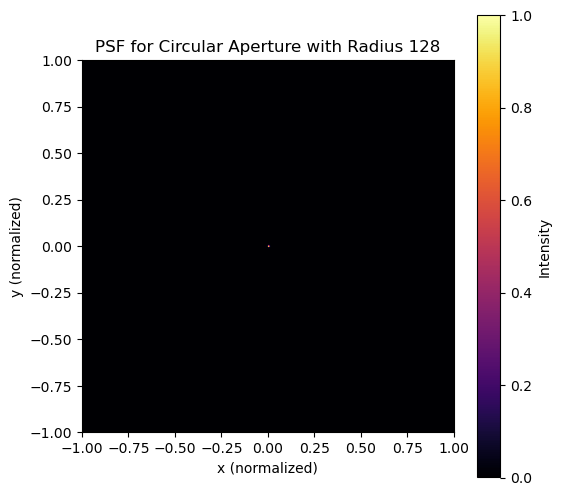

Saved PSF image for radius 128 as PSF_radius_128.png


<Figure size 640x480 with 0 Axes>

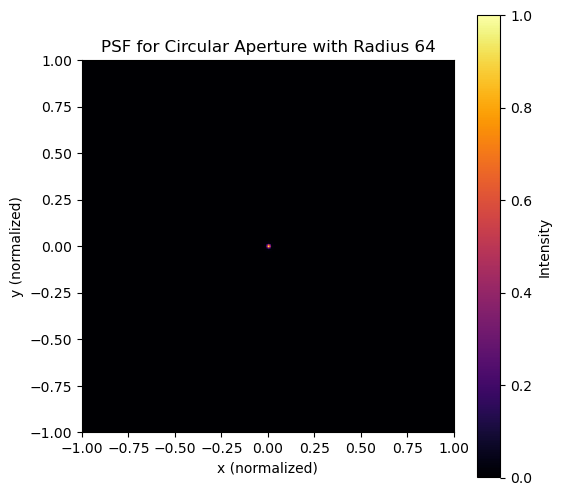

Saved PSF image for radius 64 as PSF_radius_64.png


<Figure size 640x480 with 0 Axes>

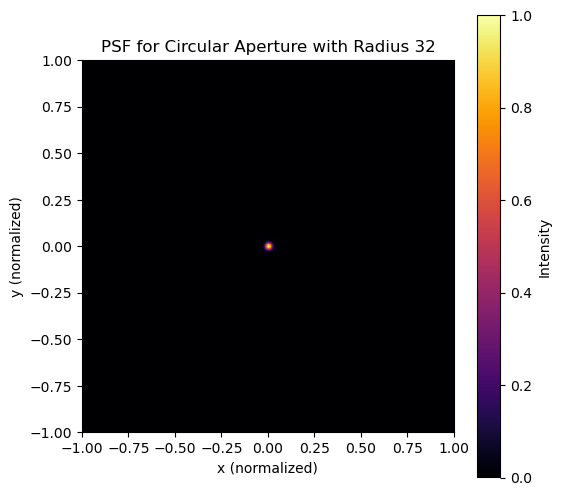

Saved PSF image for radius 32 as PSF_radius_32.png


<Figure size 640x480 with 0 Axes>

In [4]:
# Radii for the circular apertures
radii = [128, 64, 32]
psfs = []

# Compute and plot the PSF for each radius
for radius in radii:
    # Create circular aperture
    aperture = create_circular_aperture(radius, grid_size)
    # Compute PSF
    psf = compute_psf(aperture)
    psfs.append(psf)
    
    # Plot the PSF
    plt.figure(figsize=(6, 6))
    plt.imshow(psf, cmap='inferno', extent=(-1, 1, -1, 1))
    plt.colorbar(label="Intensity")
    plt.title(f"PSF for Circular Aperture with Radius {radius}")
    plt.xlabel("x (normalized)")
    plt.ylabel("y (normalized)")
    plt.show()

# Save the image as a PNG file
    filename = f"PSF_radius_{radius}.png"
    plt.savefig(filename)
    print(f"Saved PSF image for radius {radius} as {filename}")

**Task 1a:** Explore how the PSF would appear in the case of other telescope mirror shapes (e.g. square, hexagonal).

In [5]:
# Function to create a square aperture
def create_square_aperture(side_length, grid_size):
    y, x = np.ogrid[:grid_size, :grid_size]
    center = grid_size // 2
    half_side = side_length // 2
    mask = (np.abs(x - center) <= half_side) & (np.abs(y - center) <= half_side)
    return mask.astype(float)

# Function to create a hexagonal aperture
def create_hexagonal_aperture(side_length, grid_size):
    y, x = np.ogrid[:grid_size, :grid_size]
    center = grid_size // 2
    # Define hexagon geometry by distance from the center using a six-sided polygon shape
    mask = np.abs(x - center) + np.abs(y - center) <= side_length
    return mask.astype(float)


Saved PSF image for Square aperture with side length 128 as PSF_Square_side_128.png
Saved PSF image for Square aperture with side length 64 as PSF_Square_side_64.png
Saved PSF image for Square aperture with side length 32 as PSF_Square_side_32.png
Saved PSF image for Hexagonal aperture with side length 128 as PSF_Hexagonal_side_128.png
Saved PSF image for Hexagonal aperture with side length 64 as PSF_Hexagonal_side_64.png
Saved PSF image for Hexagonal aperture with side length 32 as PSF_Hexagonal_side_32.png


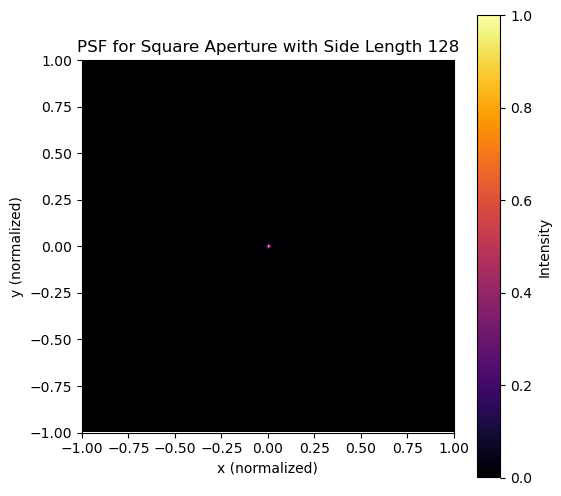

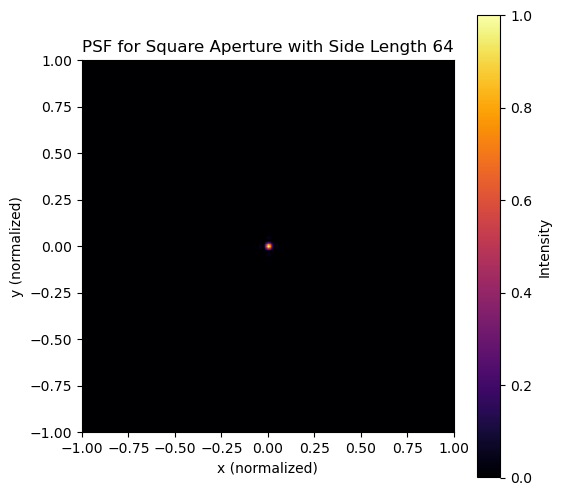

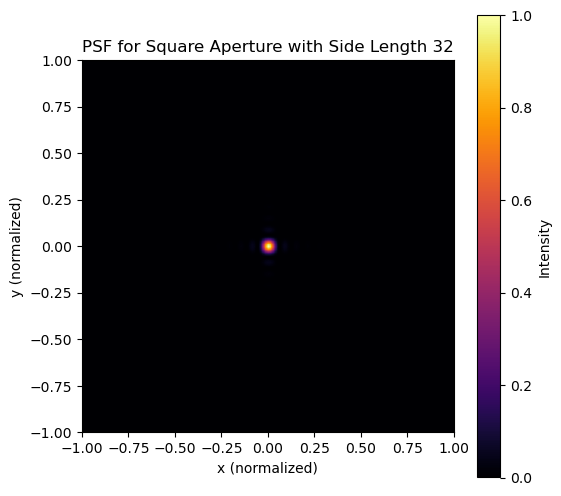

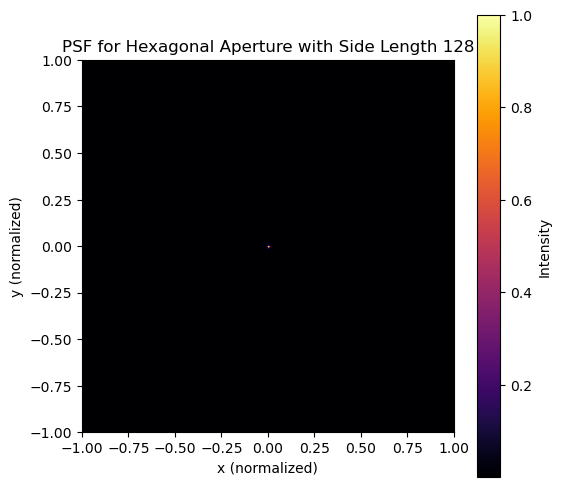

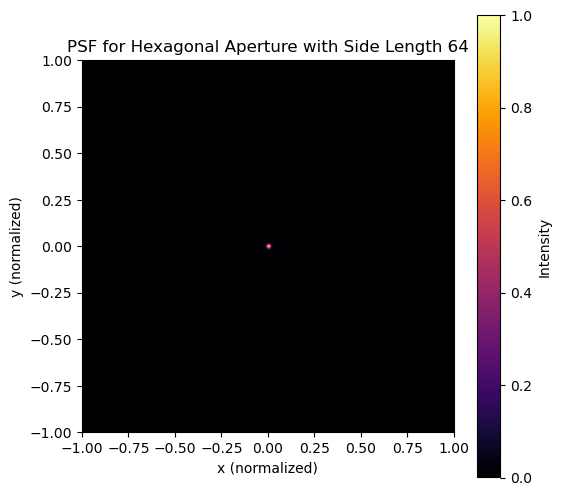

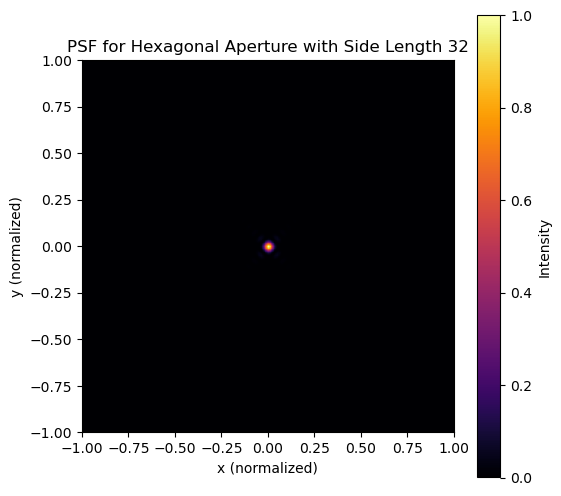

In [6]:
# Side lengths for the square and hexagonal apertures
side_lengths = [128, 64, 32]

# Compute and plot the PSF for square and hexagonal apertures
for shape, aperture_function in [("Square", create_square_aperture), ("Hexagonal", create_hexagonal_aperture)]:
    for side_length in side_lengths:
        # Create the aperture of specified shape and size
        aperture = aperture_function(side_length, grid_size)
        # Compute PSF
        psf = compute_psf(aperture)
        
        # Plot and save the PSF
        plt.figure(figsize=(6, 6))
        plt.imshow(psf, cmap='inferno', extent=(-1, 1, -1, 1))
        plt.colorbar(label="Intensity")
        plt.title(f"PSF for {shape} Aperture with Side Length {side_length}")
        plt.xlabel("x (normalized)")
        plt.ylabel("y (normalized)")
        
        # Save the image as a PNG file
        filename = f"PSF_{shape}_side_{side_length}.png"
        plt.savefig(filename)
        print(f"Saved PSF image for {shape} aperture with side length {side_length} as {filename}")

## Image Formation

**Task 2:** Produce the image of any ideal source (e.g. model of an ideal star or galaxy) seen through the circular aperture (e.g. one of those created within the previous task).

In [7]:
from scipy.ndimage import convolve

In [8]:
# Function to create an ideal source image (point source/star)
def create_point_source(grid_size, intensity=1.0):
    source = np.zeros((grid_size, grid_size))
    center = grid_size // 2
    source[center, center] = intensity  # Set a single bright pixel at the center
    return source

# Function to create an extended source (e.g., a galaxy) as a Gaussian
def create_gaussian_source(grid_size, sigma=5, intensity=1.0):
    y, x = np.ogrid[:grid_size, :grid_size]
    center = grid_size // 2
    gaussian = intensity * np.exp(-((x - center)**2 + (y - center)**2) / (2 * sigma**2))
    return gaussian

In [9]:
# Select the aperture radius for the PSF (using radius 128 from Task 1 as an example)
aperture_radius = 128
aperture = create_circular_aperture(aperture_radius, grid_size)
psf = compute_psf(aperture)

# Create source images
point_source = create_point_source(grid_size)
gaussian_source = create_gaussian_source(grid_size, sigma=10)

# Convolve the sources with the PSF to simulate the image formation
point_source_image = convolve(point_source, psf)
gaussian_source_image = convolve(gaussian_source, psf)

Saved image for point source as Image_Point_Source.png
Saved image for extended source as Image_Gaussian_Source.png


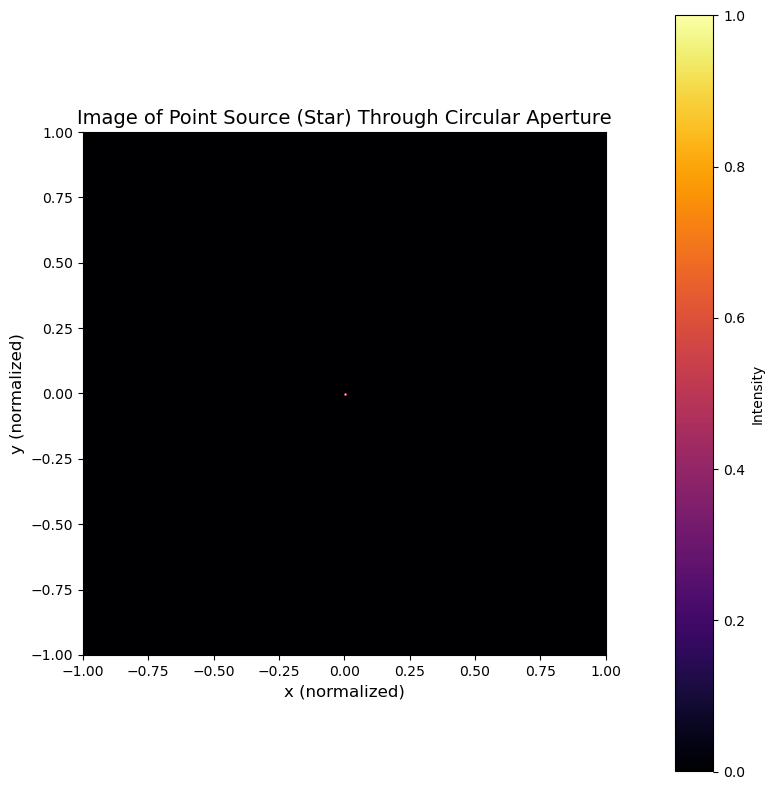

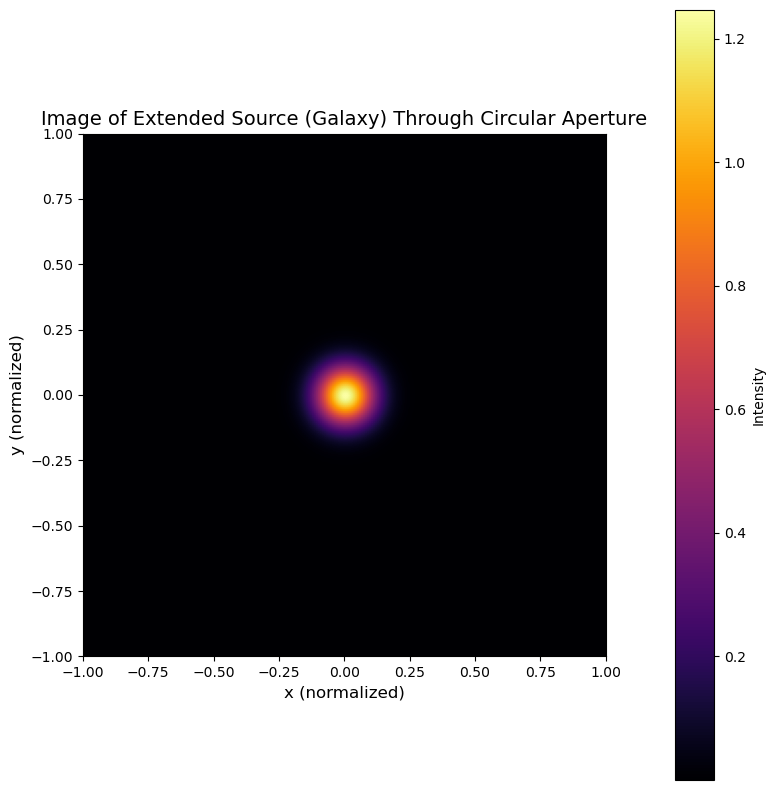

In [12]:
# Plot the results with adjusted font sizes and layout
# Point source (star)
plt.figure(figsize=(8, 8))
plt.imshow(point_source_image, cmap='inferno', extent=(-1, 1, -1, 1))
plt.colorbar(label="Intensity", pad=0.1)  # Add padding to color bar
plt.title("Image of Point Source (Star) Through Circular Aperture", fontsize=14)
plt.xlabel("x (normalized)", fontsize=12)
plt.ylabel("y (normalized)", fontsize=12)
plt.tight_layout()  # Adjust layout to avoid overlap
plt.savefig("Image_Point_Source.png")
print("Saved image for point source as Image_Point_Source.png")

# Extended source (galaxy)
plt.figure(figsize=(8, 8))
plt.imshow(gaussian_source_image, cmap='inferno', extent=(-1, 1, -1, 1))
plt.colorbar(label="Intensity", pad=0.1)  # Add padding to color bar
plt.title("Image of Extended Source (Galaxy) Through Circular Aperture", fontsize=14)
plt.xlabel("x (normalized)", fontsize=12)
plt.ylabel("y (normalized)", fontsize=12)
plt.tight_layout()  # Adjust layout to avoid overlap
plt.savefig("Image_Gaussian_Source.png")
print("Saved image for extended source as Image_Gaussian_Source.png")

## Wavefront Perturbations and Zernike Polynomials

**Task 3:** Examin how defocusing of the optical system will affect the resulting image. Compare the obtained image with the image for a focused system.

In [14]:
from scipy.ndimage import gaussian_filter

In [15]:
# Function to apply the defocusing Zernike polynomial to simulate defocusing
def apply_defocus_zernike(aperture, strength=1.0):
    y, x = np.ogrid[:aperture.shape[0], :aperture.shape[1]]
    center = aperture.shape[0] // 2
    rho = np.sqrt((x - center)**2 + (y - center)**2) / center
    rho[rho > 1] = 1  # Limit rho to [0, 1]
    
    # Apply the defocusing Zernike polynomial: Z_2^0 = sqrt(3) * (2 * rho^2 - 1)
    phase_shift = strength * np.sqrt(3) * (2 * rho**2 - 1)
    defocused_aperture = aperture * np.exp(1j * phase_shift)
    
    # Calculate the PSF from the defocused aperture
    ft_defocused_aperture = fftshift(fft2(defocused_aperture))
    defocused_psf = np.abs(ft_defocused_aperture)**2
    defocused_psf /= np.max(defocused_psf)  # Normalize the PSF
    return defocused_psf

In [21]:
# Define parameters for the defocusing effect and aperture
defocus_strength = 3.0
circular_aperture = create_circular_aperture(aperture_radius, grid_size)

# Calculate the defocused PSF using the Zernike polynomial
defocused_psf = apply_defocus_zernike(circular_aperture, strength=defocus_strength)

# Create source images: point source (star) and extended source (galaxy)
point_source = create_point_source(grid_size)
galaxy_source = create_gaussian_source(grid_size, sigma=10)

# Convolve the defocused PSF with both sources
defocused_star_image = convolve(point_source, defocused_psf)
defocused_galaxy_image = convolve(galaxy_source, defocused_psf)

Saved image for defocused star as 'Defocused_Star_Image.png'
Saved image for defocused galaxy as 'Defocused_Galaxy_Image.png'


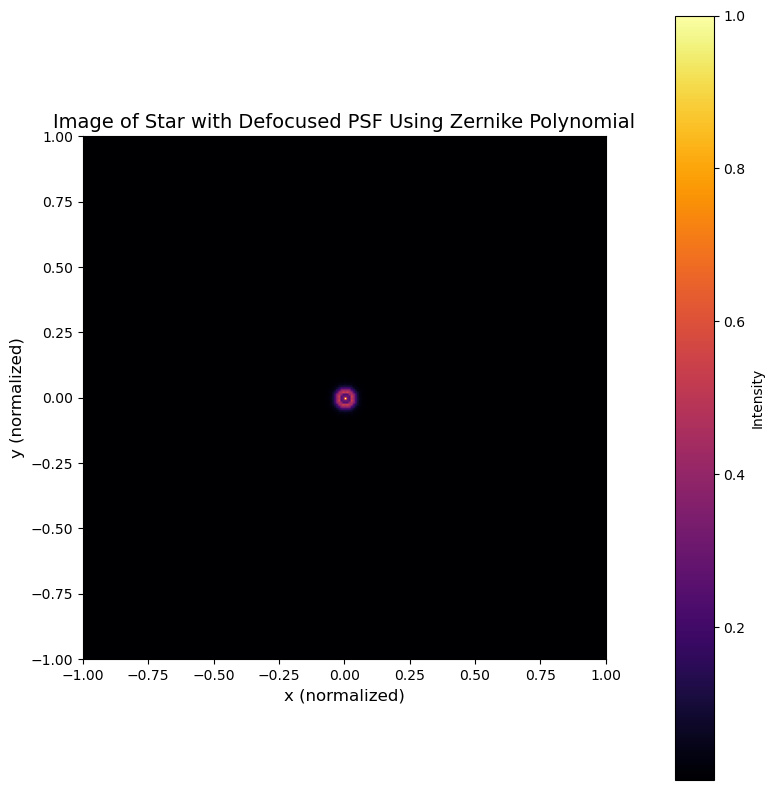

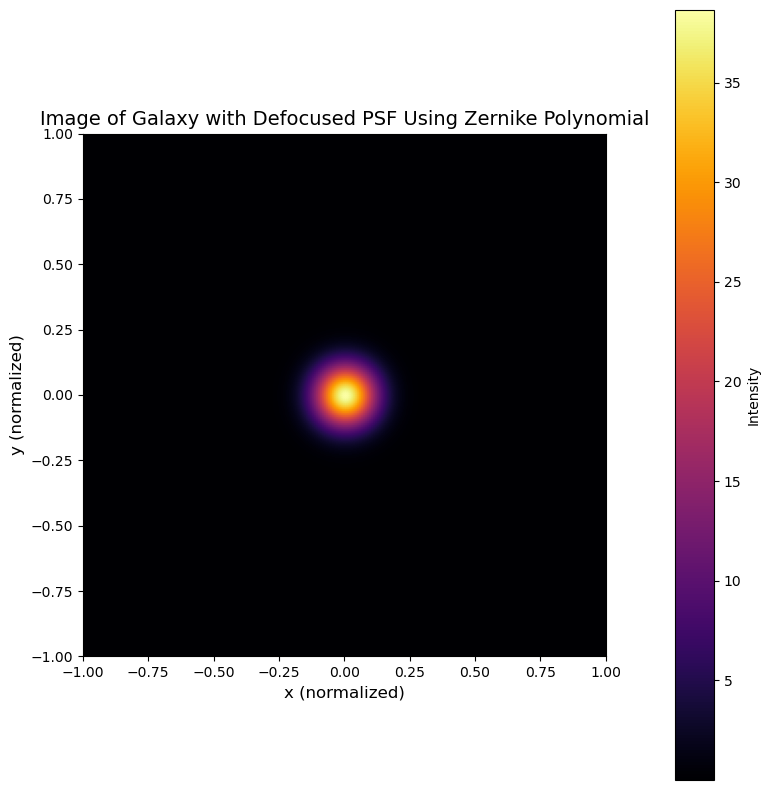

In [22]:
# Plot and save the defocused images for both the star and galaxy

# Defocused point source (star)
plt.figure(figsize=(8, 8))
plt.imshow(defocused_star_image, cmap='inferno', extent=(-1, 1, -1, 1))
plt.colorbar(label="Intensity", pad=0.1)
plt.title("Image of Star with Defocused PSF Using Zernike Polynomial", fontsize=14)
plt.xlabel("x (normalized)", fontsize=12)
plt.ylabel("y (normalized)", fontsize=12)
plt.tight_layout()  # Adjust layout to avoid overlap
plt.savefig("Defocused_Star_Image.png")  # Save the image
print("Saved image for defocused star as 'Defocused_Star_Image.png'")

# Defocused extended source (galaxy)
plt.figure(figsize=(8, 8))
plt.imshow(defocused_galaxy_image, cmap='inferno', extent=(-1, 1, -1, 1))
plt.colorbar(label="Intensity", pad=0.1)
plt.title("Image of Galaxy with Defocused PSF Using Zernike Polynomial", fontsize=14)
plt.xlabel("x (normalized)", fontsize=12)
plt.ylabel("y (normalized)", fontsize=12)
plt.tight_layout()  # Adjust layout to avoid overlap
plt.savefig("Defocused_Galaxy_Image.png")  # Save the image
print("Saved image for defocused galaxy as 'Defocused_Galaxy_Image.png'")

**Task 4:** Consider other influences of wavefront deformation (spherical abberation, coma) on image formation. Try to create a linear combination and see how it affects the image.

In [23]:
# Function to apply Zernike polynomial for different types of aberrations
def apply_zernike_aberration(aperture, aberration_type, strength=1.0):
    # Create a radial coordinate grid normalized from 0 to 1
    y, x = np.ogrid[:aperture.shape[0], :aperture.shape[1]]
    center = aperture.shape[0] // 2
    rho = np.sqrt((x - center)**2 + (y - center)**2) / center
    rho[rho > 1] = 1  # Limit rho to [0, 1]
    theta = np.arctan2(y - center, x - center)
    
    # Select Zernike polynomial based on aberration type
    if aberration_type == "defocus":
        phase_shift = strength * np.sqrt(3) * (2 * rho**2 - 1)
    elif aberration_type == "oblique_astigmatism":
        phase_shift = strength * np.sqrt(6) * rho**2 * np.sin(2 * theta)
    elif aberration_type == "vertical_astigmatism":
        phase_shift = strength * np.sqrt(6) * rho**2 * np.cos(2 * theta)
    elif aberration_type == "vertical_coma":
        phase_shift = strength * np.sqrt(8) * (3 * rho**3 - 2 * rho) * np.sin(theta)
    elif aberration_type == "horizontal_coma":
        phase_shift = strength * np.sqrt(8) * (3 * rho**3 - 2 * rho) * np.cos(theta)
    elif aberration_type == "spherical_aberration":
        phase_shift = strength * np.sqrt(5) * (6 * rho**4 - 6 * rho**2 + 1)
    else:
        raise ValueError("Unknown aberration type")
    
    # Apply the phase shift to the aperture by converting to complex form
    aberrated_aperture = aperture * np.exp(1j * phase_shift)
    
    # Calculate the PSF from the aberrated aperture
    ft_aberrated_aperture = fftshift(fft2(aberrated_aperture))
    aberrated_psf = np.abs(ft_aberrated_aperture)**2
    aberrated_psf /= np.max(aberrated_psf)  # Normalize the PSF
    return aberrated_psf

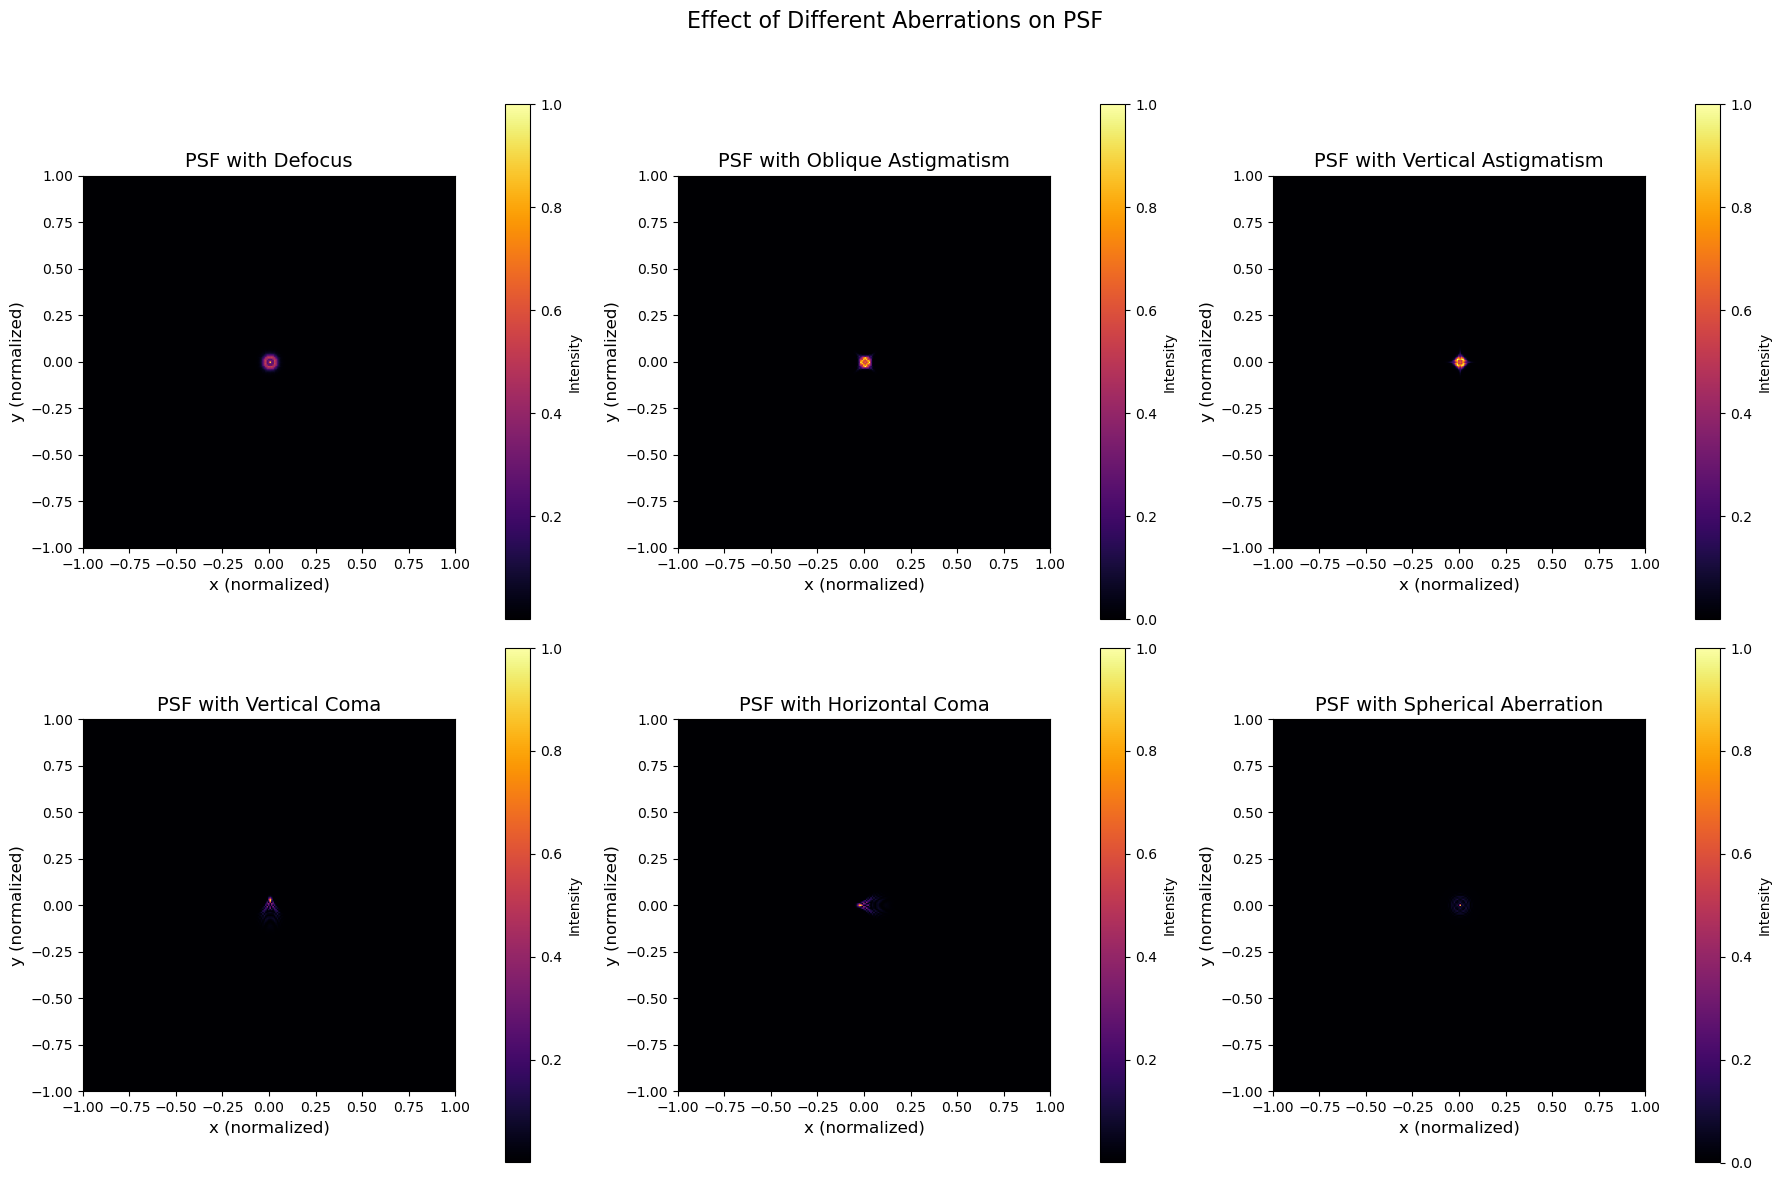

In [27]:
# Define parameters for the circular aperture
aperture_radius = 128
circular_aperture = create_circular_aperture(aperture_radius, grid_size)

# Define aberration types to simulate
aberration_types = [
    "defocus", "oblique_astigmatism", "vertical_astigmatism", 
    "vertical_coma", "horizontal_coma", "spherical_aberration"
]

# Strength of aberration effect
aberration_strength = 3.0

# Plot each aberrated PSF
plt.figure(figsize=(18, 12))
for i, aberration in enumerate(aberration_types, start=1):
    # Calculate the PSF with the aberration
    aberrated_psf = apply_zernike_aberration(circular_aperture, aberration, strength=aberration_strength)
    
    # Plot the PSF
    plt.subplot(2, 3, i)
    plt.imshow(aberrated_psf, cmap='inferno', extent=(-1, 1, -1, 1))
    plt.colorbar(label="Intensity", pad=0.1)
    plt.title(f"PSF with {aberration.replace('_', ' ').title()}", fontsize=14)
    plt.xlabel("x (normalized)", fontsize=12)
    plt.ylabel("y (normalized)", fontsize=12)
    #plt.savefig(f"PSF_{aberration}.png")  # Save each aberration image
    #print(f"Saved PSF image for {aberration} as 'PSF_{aberration}.png'")

plt.suptitle("Effect of Different Aberrations on PSF", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit main title
plt.savefig("PSF_aberrations.png")  # Save image
plt.show()

In [30]:
# Function to apply a linear combination of spherical aberration and coma
def apply_combined_aberration(aperture, spherical_weight=1.0, coma_weight=1.0):
    # Create a radial coordinate grid normalized from 0 to 1
    y, x = np.ogrid[:aperture.shape[0], :aperture.shape[1]]
    center = aperture.shape[0] // 2
    rho = np.sqrt((x - center)**2 + (y - center)**2) / center
    rho[rho > 1] = 1  # Limit rho to [0, 1]
    theta = np.arctan2(y - center, x - center)
    
    # Spherical aberration: Z_4^0 = sqrt(5) * (6 * rho^4 - 6 * rho^2 + 1)
    spherical_phase_shift = spherical_weight * np.sqrt(5) * (6 * rho**4 - 6 * rho**2 + 1)
    
    # Vertical coma: Z_3^-1 = sqrt(8) * (3 * rho^3 - 2 * rho) * sin(theta)
    coma_phase_shift = coma_weight * np.sqrt(8) * (3 * rho**3 - 2 * rho) * np.sin(theta)
    
    # Combine the phase shifts
    combined_phase_shift = spherical_phase_shift + coma_phase_shift
    
    # Apply the combined phase shift to the aperture
    aberrated_aperture = aperture * np.exp(1j * combined_phase_shift)
    
    # Calculate the PSF from the aberrated aperture
    ft_aberrated_aperture = fftshift(fft2(aberrated_aperture))
    aberrated_psf = np.abs(ft_aberrated_aperture)**2
    aberrated_psf /= np.max(aberrated_psf)  # Normalize the PSF
    return aberrated_psf

Saved PSF image for combined spherical aberration and coma as 'PSF_Combined_Spherical_Coma.png'


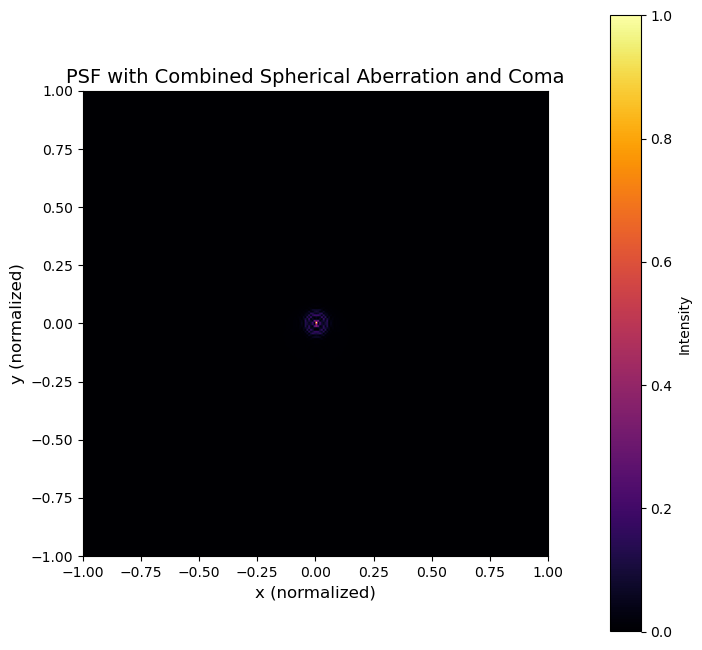

In [32]:
# Parameters for the aperture and weights for the aberrations
aperture_radius = 128
circular_aperture = create_circular_aperture(aperture_radius, grid_size)
spherical_weight = 3.0
coma_weight = 1.5

# Generate the combined aberration PSF
combined_aberrated_psf = apply_combined_aberration(circular_aperture, spherical_weight, coma_weight)

# Plot and save the combined aberration PSF
plt.figure(figsize=(8, 8))
plt.imshow(combined_aberrated_psf, cmap='inferno', extent=(-1, 1, -1, 1))
plt.colorbar(label="Intensity", pad=0.1)
plt.title("PSF with Combined Spherical Aberration and Coma", fontsize=14)
plt.xlabel("x (normalized)", fontsize=12)
plt.ylabel("y (normalized)", fontsize=12)
plt.savefig("PSF_Combined_Spherical_Coma.png")
print("Saved PSF image for combined spherical aberration and coma as 'PSF_Combined_Spherical_Coma.png'")
plt.show()

In [33]:
# Set parameters for the aperture and aberration weights
grid_size = 256
aperture_radius = 128
spherical_weight = 3.0
coma_weight = 1.5
circular_aperture = create_circular_aperture(aperture_radius, grid_size)

# Generate the combined aberrated PSF
combined_aberrated_psf = apply_combined_aberration(circular_aperture, spherical_weight, coma_weight)

# Create the galaxy source
galaxy_source = create_gaussian_source(grid_size, sigma=10)

# Convolve the combined aberrated PSF with the galaxy source
aberrated_galaxy_image = convolve(galaxy_source, combined_aberrated_psf)

Saved image for galaxy with combined spherical aberration and coma as 'Aberrated_Galaxy_Combined_Spherical_Coma.png'


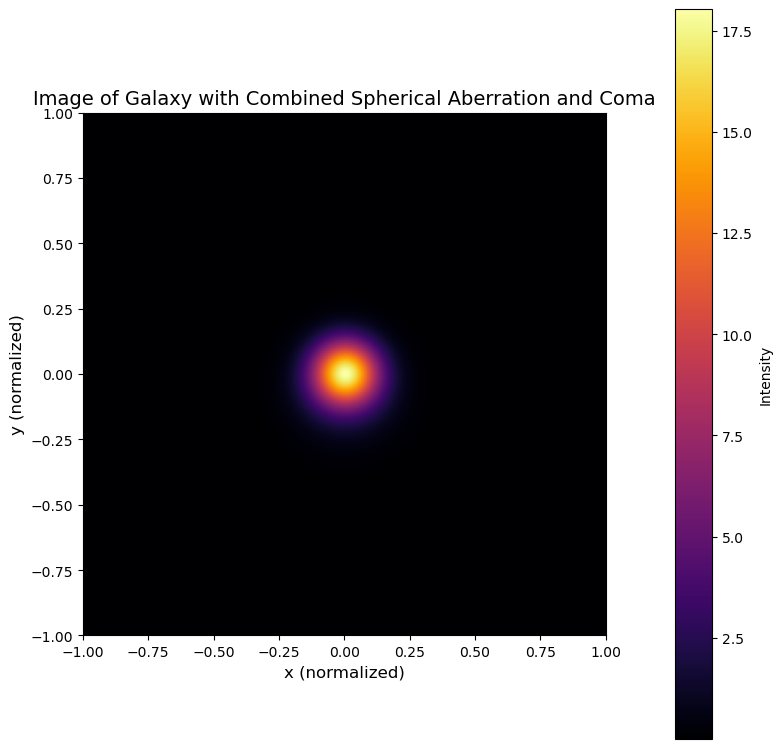

In [35]:
# Plot and save the aberrated galaxy image
plt.figure(figsize=(8, 8))
plt.imshow(aberrated_galaxy_image, cmap='inferno', extent=(-1, 1, -1, 1))
plt.colorbar(label="Intensity", pad=0.1)
plt.title("Image of Galaxy with Combined Spherical Aberration and Coma", fontsize=14)
plt.xlabel("x (normalized)", fontsize=12)
plt.ylabel("y (normalized)", fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.savefig("Aberrated_Galaxy_Combined_Spherical_Coma.png")
print("Saved image for galaxy with combined spherical aberration and coma as 'Aberrated_Galaxy_Combined_Spherical_Coma.png'")
plt.show()

**Task 5:** Reflectors have a secondary mirror, which effectively reduces the aperture area. Compare the PSF and final image in the case of a telescope with a circular aperture (of your choice, on the same grid as in the first task) and with a central obstruction of 0.1 and 0.5 radii of the telescope's primary mirror.

In [37]:
# Function to create an aperture with a central obstruction
def create_obstructed_aperture(primary_radius, obstruction_ratio, grid_size):
    # Create the primary circular aperture
    aperture = create_circular_aperture(primary_radius, grid_size)
    
    # Create the central obstruction
    obstruction_radius = int(primary_radius * obstruction_ratio)
    y, x = np.ogrid[:grid_size, :grid_size]
    center = grid_size // 2
    obstruction = (x - center)**2 + (y - center)**2 <= obstruction_radius**2
    
    # Apply the obstruction (set central region to zero)
    aperture[obstruction] = 0
    return aperture

Saved PSF image for central obstruction ratio 0.1 as 'PSF_Obstruction_Ratio_0.1.png'
Saved PSF image for central obstruction ratio 0.5 as 'PSF_Obstruction_Ratio_0.5.png'


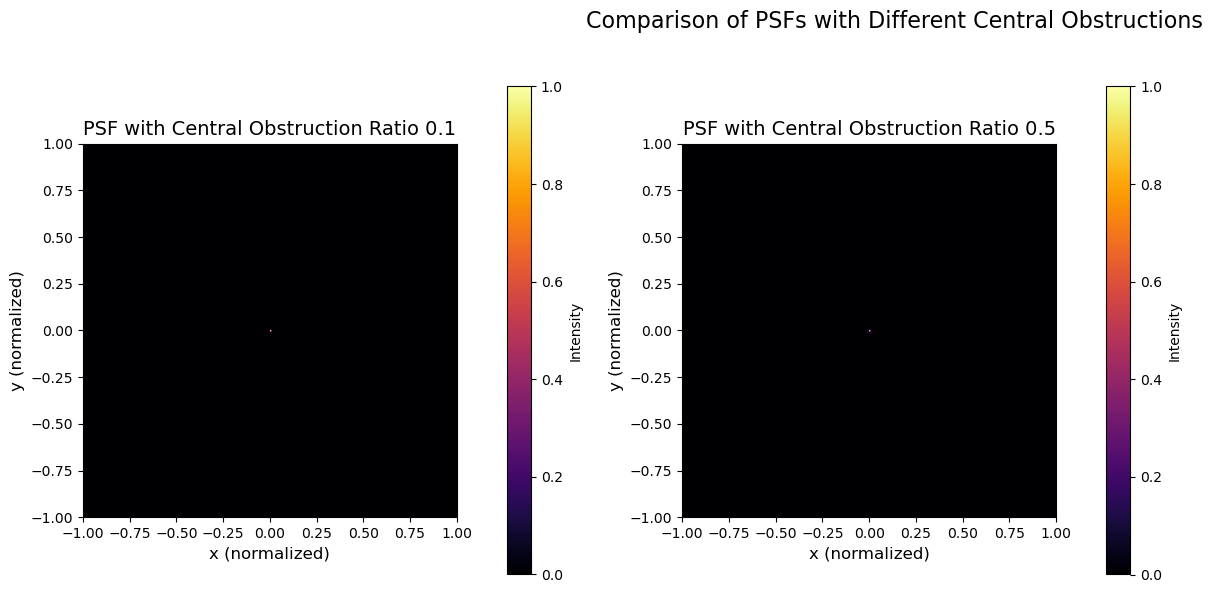

In [38]:
# Define parameters
grid_size = 256
primary_radius = 128
obstruction_ratios = [0.1, 0.5]  # Ratios of the primary mirror's radius

# Compute and visualize PSFs for each obstruction ratio
plt.figure(figsize=(18, 6))

for i, ratio in enumerate(obstruction_ratios, start=1):
    # Create the obstructed aperture
    obstructed_aperture = create_obstructed_aperture(primary_radius, ratio, grid_size)
    # Compute the PSF
    obstructed_psf = compute_psf(obstructed_aperture)
    
    # Plot the PSF
    plt.subplot(1, 3, i)
    plt.imshow(obstructed_psf, cmap='inferno', extent=(-1, 1, -1, 1))
    plt.colorbar(label="Intensity", pad=0.1)
    plt.title(f"PSF with Central Obstruction Ratio {ratio}", fontsize=14)
    plt.xlabel("x (normalized)", fontsize=12)
    plt.ylabel("y (normalized)", fontsize=12)
    plt.savefig(f"PSF_Obstruction_Ratio_{ratio}.png")
    print(f"Saved PSF image for central obstruction ratio {ratio} as 'PSF_Obstruction_Ratio_{ratio}.png'")

plt.suptitle("Comparison of PSFs with Different Central Obstructions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Saved final galaxy image for obstruction ratio 0.1 as 'Galaxy_Image_Obstruction_Ratio_0.1.png'
Saved final galaxy image for obstruction ratio 0.5 as 'Galaxy_Image_Obstruction_Ratio_0.5.png'


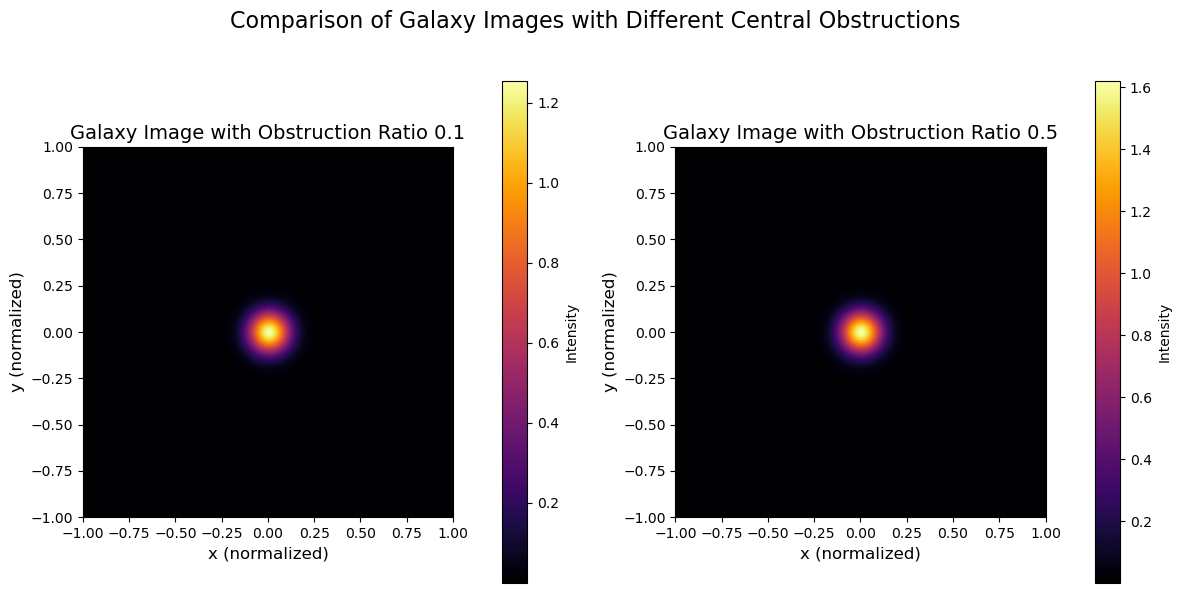

In [41]:
# Define only the obstructed cases to be analyzed
obstruction_cases = [(0.1, "Obstruction Ratio 0.1"), (0.5, "Obstruction Ratio 0.5")]

# Initialize lists to store PSFs and final galaxy images
psfs = []
final_images = []

# Calculate PSFs and final images for each obstruction case
for obstruction_ratio, label in obstruction_cases:
    # Create the obstructed aperture
    aperture = create_obstructed_aperture(primary_radius, obstruction_ratio, grid_size)
    
    # Compute the PSF
    psf = compute_psf(aperture)
    psfs.append((psf, label))
    
    # Convolve the PSF with the galaxy source
    final_image = convolve(galaxy_source, psf)
    final_images.append((final_image, label))

# Plot and save the final images for each PSF
plt.figure(figsize=(12, 6))
for i, (final_image, label) in enumerate(final_images, start=1):
    plt.subplot(1, 2, i)
    plt.imshow(final_image, cmap='inferno', extent=(-1, 1, -1, 1))
    plt.colorbar(label="Intensity", pad=0.1)
    plt.title(f"Galaxy Image with {label}", fontsize=14)
    plt.xlabel("x (normalized)", fontsize=12)
    plt.ylabel("y (normalized)", fontsize=12)
    plt.savefig(f"Galaxy_Image_{label.replace(' ', '_')}.png")
    print(f"Saved final galaxy image for {label.lower()} as 'Galaxy_Image_{label.replace(' ', '_')}.png'")

plt.suptitle("Comparison of Galaxy Images with Different Central Obstructions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()